In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


combined_mousedata = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")


combined_mousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [163]:
mouse_data = combined_mousedata["Mouse ID"].unique()
number_of_mouse = len(mice_data)
number_of_mouse

249

In [164]:
dupli_mouse = combined_micedata[combined_micedata[["Mouse ID", "Timepoint"]].duplicated() == True]
dupli_mouse_id = dupli_mouse["Mouse ID"].unique()
dupli_mouse_id

array(['g989'], dtype=object)

In [165]:
dupli_mouse_data = combined_micedata.loc[total_data["Mouse ID"] == dupli_mouse_id[0]]
dupli_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [166]:
clean_total_mousedata = combined_mousedata.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_total_mousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [167]:
cleanmouse_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [168]:
clean_mouse = cleanmouse_df["Mouse ID"].value_counts()
clean_number_of_mouse = len(clean_mice)
clean_number_of_mouse

248

Summary Statistics

In [169]:
drug_mouse_data = cleanmouse_df.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_mouse_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_mouse_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_mouse_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_mouse_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_mouse_sem = group_drug_data["Tumor Volume (mm3)"].sem()

drug_mouse_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_mouse_mean,
                                 "Median Tumor Volume":  drug_mouse_median,
                                 "Tumor Volume Variance":  drug_mouse_var,
                                 "Tumor Volume Std. Dev.":  drug_mouse_std,
                                 "Tumor Volume Std. Err.":  drug_mouse_sem})
drug_mouse_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [170]:
mousereg_sum_df = drug_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
mousereg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

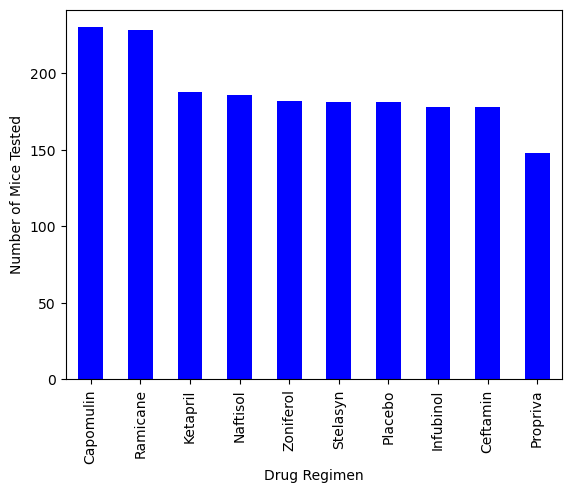

In [171]:
mouse_and_drug = cleanmouse_df[["Drug Regimen","Timepoint"]]



mouse_per_drugs = mouse_and_drug["Drug Regimen"].value_counts()
mouse_per_drugs




mouse_per_drugs.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()

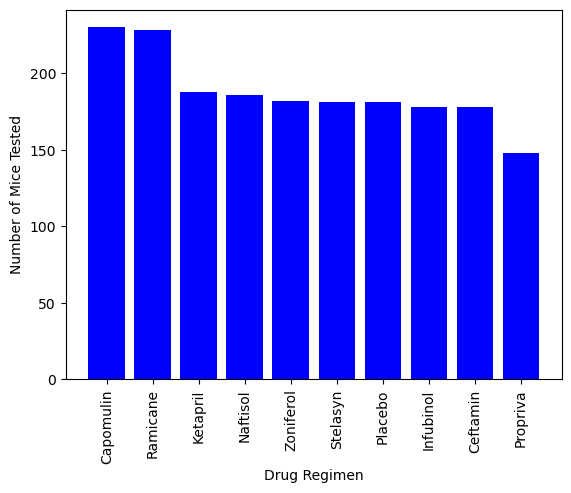

In [172]:
drugs = mouse_per_drugs.index.values
count = mouse_per_drugs.values


plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

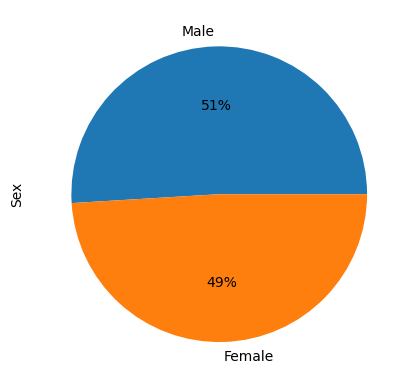

In [173]:
mousemale_vs_mousefemale = cleanmouse_df["Sex"].value_counts()
Sex = ["Male", "Female"]
mousemale_vs_mousefemale.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

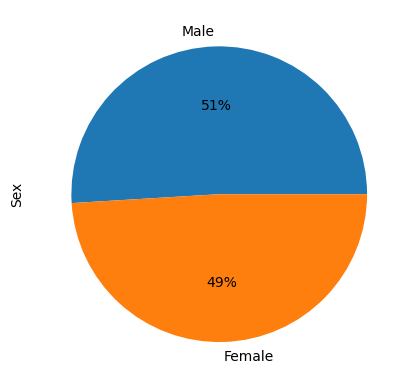

In [174]:
mouse_sex_label = mousemale_vs_mousefemale.index.values
count_value = mousemale_vs_mousefemale.values
plt.ylabel("Sex")
plt.pie(count_value, labels = mouse_sex_label, autopct="%1.0f%%")
plt.show()

Quartiles, Outliers, and boxplots

In [175]:
mousereduced_drug_data = cleanmouse_df.loc[(cleanmouse_df["Drug Regimen"] == "Capomulin") | (cleanmouse_df["Drug Regimen"] == "Ramicane")
|
(cleanmouse_df["Drug Regimen"] == "Infubinol") 
|(cleanmouse_df["Drug Regimen"] == "Ceftamin") ]

last_timepoint = mousereduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
last_new_timepoint = last_timepoint.reset_index()

r_last_timepoint = last_new_timepoint[["Drug Regimen", "Tumor Volume (mm3)"]]
r_last_timepoint

capomulin_mouse = r_last_timepoint.loc[r_last_timepoint["Drug Regimen"] == "Capomulin"]
capomulin_mouse

ramicane_mouse = r_last_timepoint.loc[r_last_timepoint["Drug Regimen"] == "Ramicane"]
ramicane_mouse

infubinol_mouse = r_last_timepoint.loc[r_last_timepoint["Drug Regimen"] == "Infubinol"]
infubinol_mouse

ceftamin_mouse = r_last_timepoint.loc[r_last_timepoint["Drug Regimen"] == "Ceftamin"]
ceftamin_mouse

mouse_new_df = pd.DataFrame({"Capomulin": capomulin_mouse["Tumor Volume (mm3)"],
         "Ramicane": ramicane_mouse["Tumor Volume (mm3)"],
          "Infubinol": infubinol_mouse["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_mouse["Tumor Volume (mm3)"]})

mouse_new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


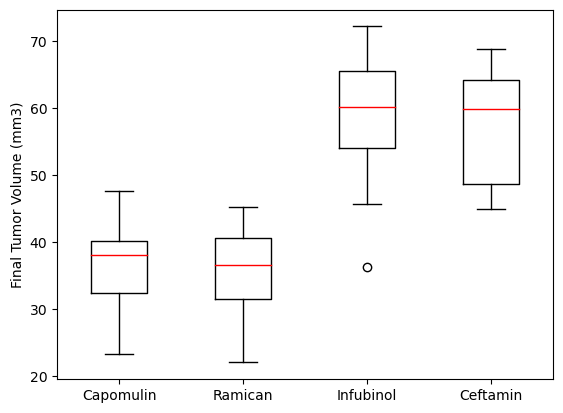

In [176]:
boxplot = mouse_new_df.boxplot(grid = False, color = dict(boxes = "k", whiskers = "k", medians = "r"))
boxplot.set_ylabel("Final Tumor Volume (mm3)")
boxplot.set_xticks([1, 2, 3, 4], ["Capomulin", "Ramican", "Infubinol", "Ceftamin"])

Line and Scatter Plots

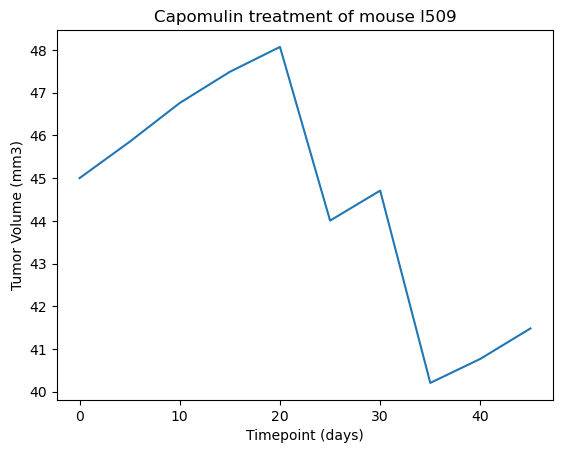

In [177]:
capomulin_mouse = clean_total_mousedata.loc[(clean_total_mousedata["Drug Regimen"] == "Capomulin") & (clean_total_mousedata["Mouse ID"] == "l509") ]
r_capomulin_mouse = capomulin_mouse[["Timepoint","Tumor Volume (mm3)" ]]
r_capomulin_mouse = r_capomulin_mouse.set_index(["Timepoint"])


timepoint = r_capomulin_mouse.index.values
tumor_vol = r_capomulin_mouse.values


plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

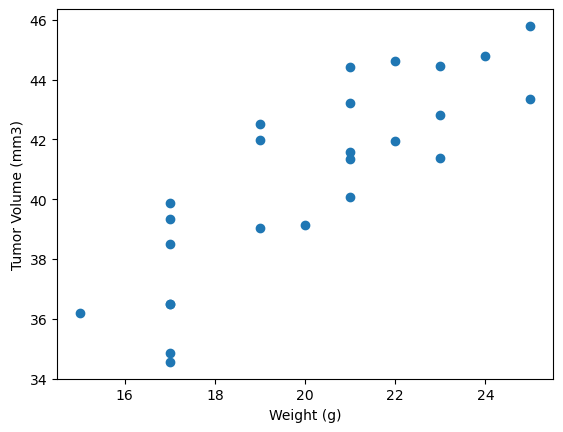

In [178]:
mouse_capomulin_df = clean_total_mousedata.loc[(clean_total_mousedata["Drug Regimen"] == "Capomulin")]
groupmouse_capomulin_df = new_capomulin_df.groupby("Mouse ID")


avgmouse_tumor_vol = groupmouse_capomulin_df[("Tumor Volume (mm3)")].mean()
weightmouse = groupmouse_capomulin_df["Weight (g)"].mean()
avgmouse_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avgmouse_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


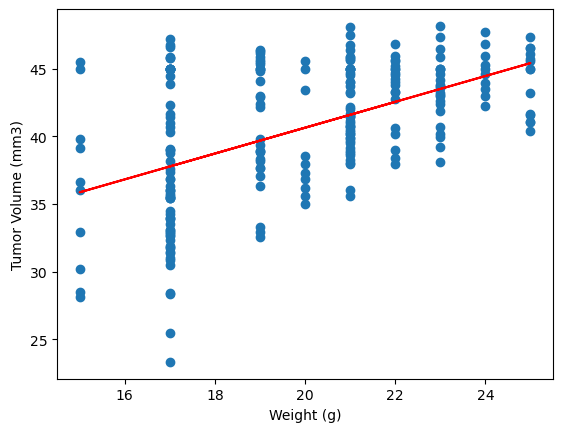

In [179]:
correlation = st.pearsonr (weight, avgmouse_tumor_vol)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = mouse_capomulin_df["Weight (g)"]
y_values = mouse_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgmouse_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()